# データ分析の工程

1.   ライブラリ・データの読み込み
2.   データの概観・前処理・EDA
3.   特徴量エンジニアリング
4.   ベースラインモデルの構築
5.   モデルの構築・調整
6.   モデルのアンサンブリング
7.   予測の出力・提出

# ライブラリ・データの読み込み

## ライブラリのインポート

In [1]:
# データ加工・処理・分析ライブラリ
import pandas as pd
import numpy as np
import numpy.random as random
import scipy as sp

# データ可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# その他
import warnings
warnings.simplefilter('ignore')

## ドライブのマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## データの読み込み

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/'

df = pd.read_csv(path + 'GCI/個人ワーク/dataset/train.csv')
df_test = pd.read_csv(path + 'GCI/個人ワーク/dataset/test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---

# データの概観・前処理・EDA

## データの概観

In [6]:
# データのサイズを確認
print('訓練データのデータ数は{}、変数は{}種類です'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は891、変数は12種類です
テストデータのデータ数は418、変数は11種類です


In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

各変数の定義

変数 |定義 |備考  
---|---|---
Perished |死亡したかどうか |0 = No, 1 = Yes
Pclass |チケットのクラス |1 = 1st, 2 = 2nd, 3 = 3rd
Name |名前 |
Sex |性別 |
Age	|年齢 |
SibSp |乗船していた兄弟姉妹・配偶者の数	|
Parch |乗船していた親・子供の数	|
Ticket |チケット番号	|
Fare |チケット料金	|
Cabin |キャビン番号	|
embarked |乗船した港	|C = Cherbourg, Q = Queenstown, S = Southampton



## EDA
データの可視化や統計量を確認することで、データの構造や特徴を掴むことが目的になります。

Pandas-profilingなどのライブラリやKaggle Notebookを参考にしてみるのも良いです。

In [9]:
# 欠損値の確認
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# 欠損値の確認
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 目的変数の分布を確認
対象データが均衡データなのか不均衡データなのかの確認を行います。

不均衡データの場合には、データの前処理やモデルの構築、評価指標の選び方など様々な点において注意が必要です。

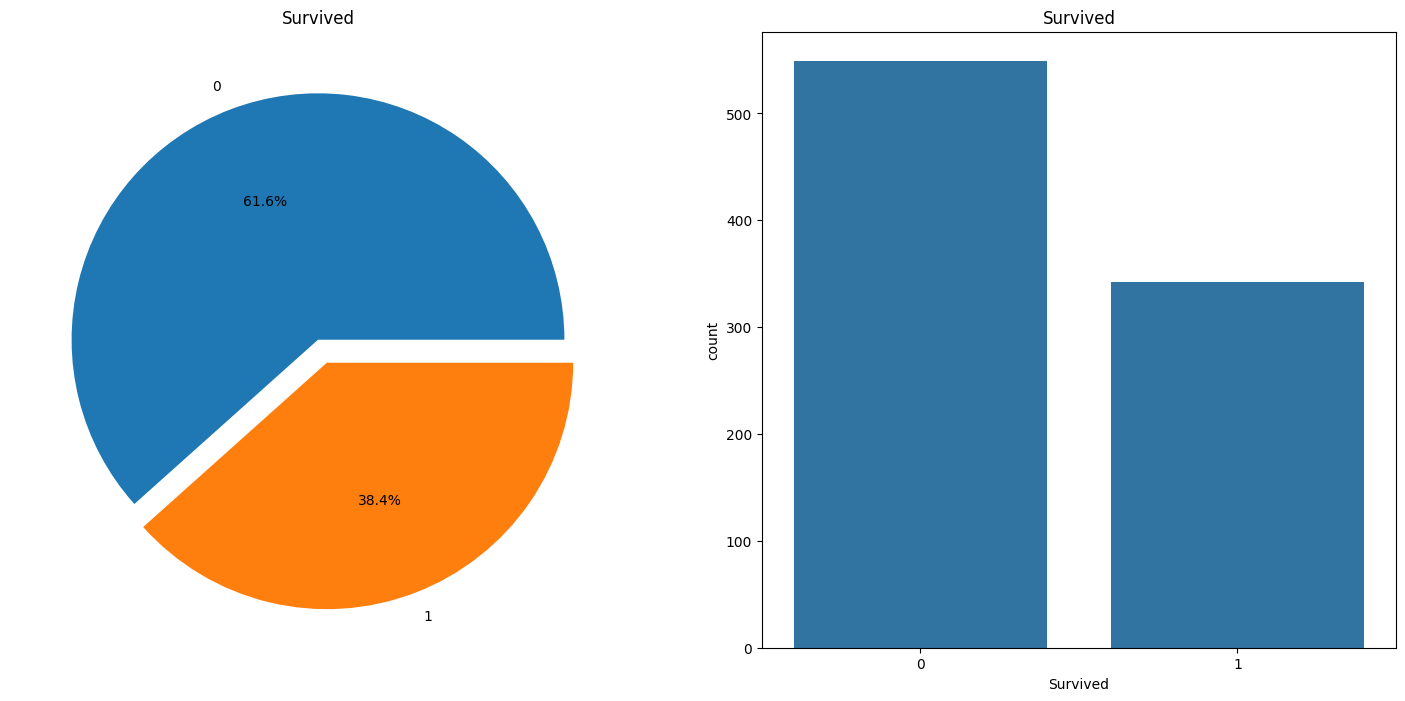

In [11]:
# 生存率を確認
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### 変数の確認

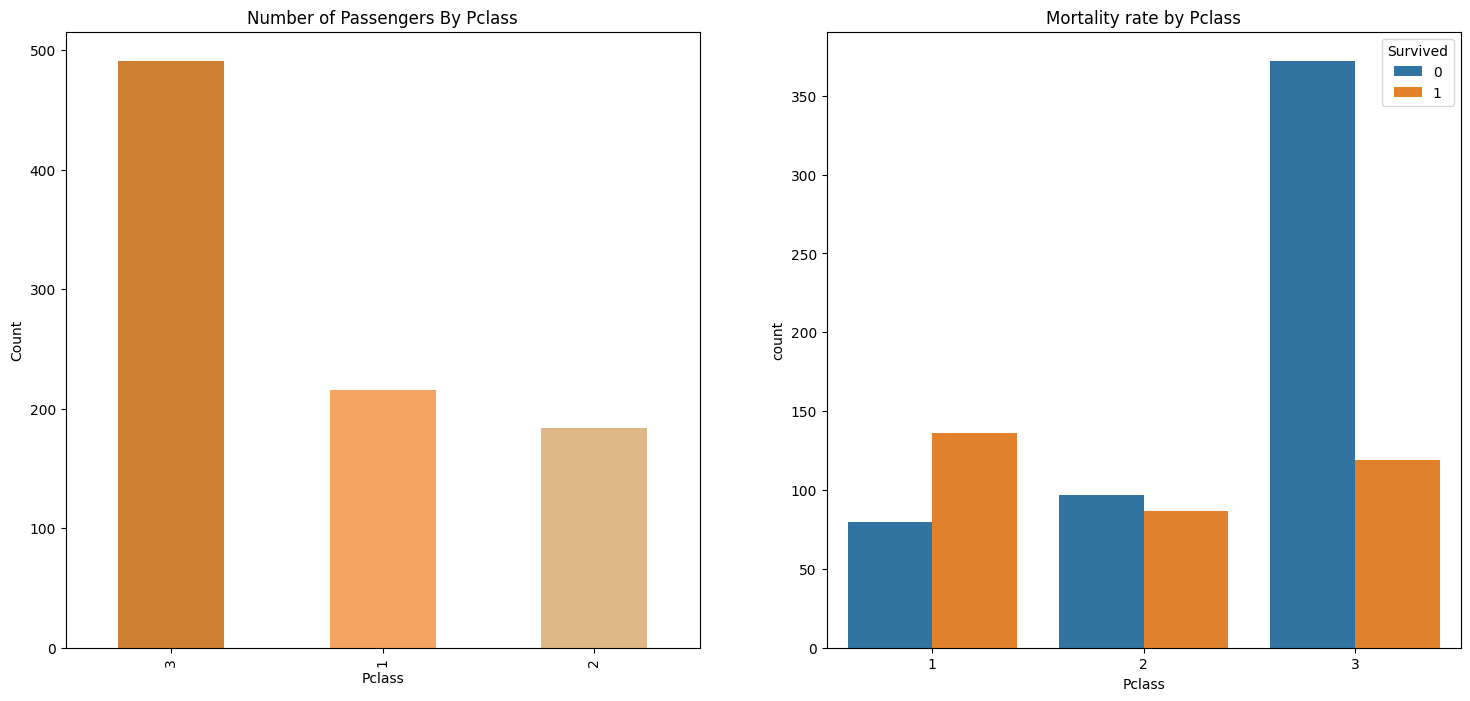

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#f4a460','#deb887'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Mortality rate by Pclass')
plt.show()

Pclassごとに人数および死亡率が著しく異なっていることが見て取れます。

特にPclass= 3 は人数が圧倒的に多く、死亡率が著しく高いことがわかります。

一方でPclass= 1 は生存率が非常に高いことがわかります。

Pclassはチケットのクラスでしたから、ここに見た事実は、Pclassの値が小さいほどチケットのグレードが高いことを直ちに示唆しています。

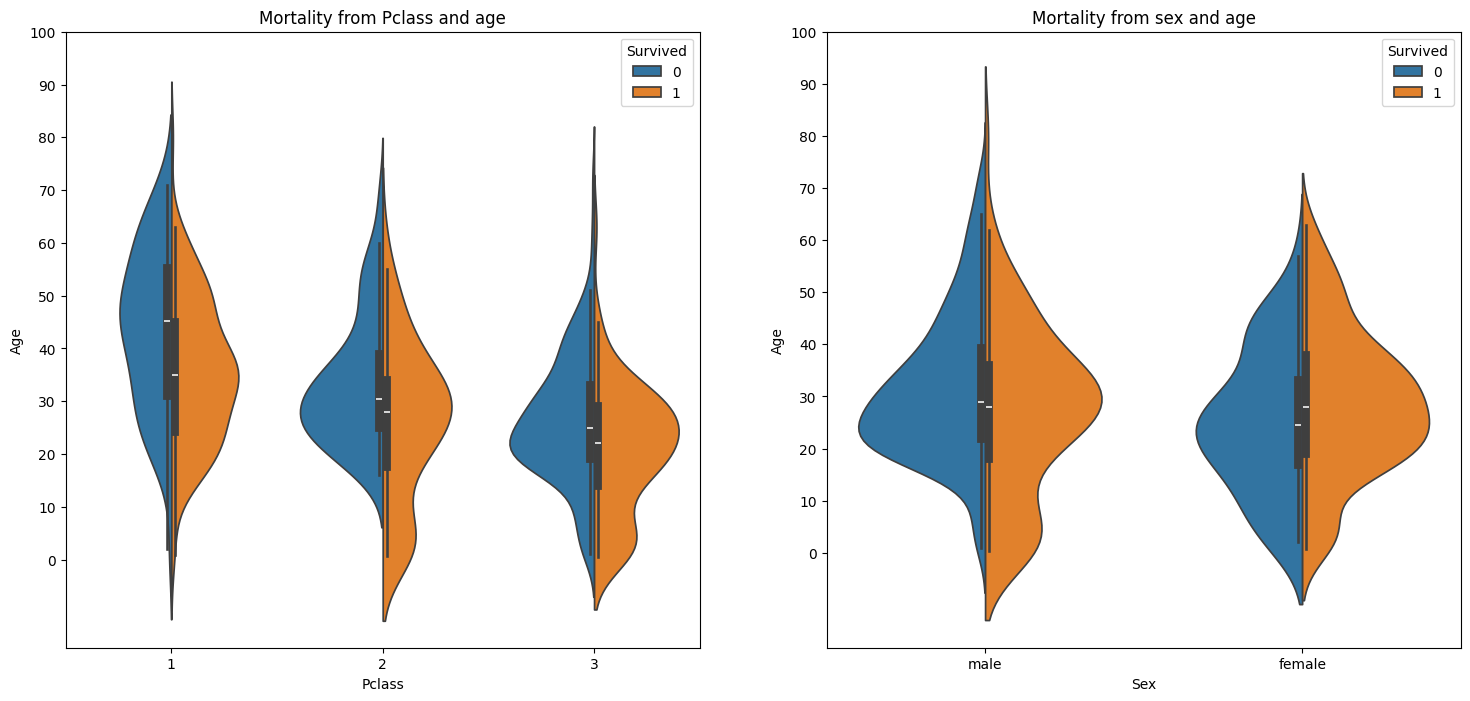

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Mortality from Pclass and age')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Mortality from sex and age')
ax[1].set_yticks(range(0,110,10))
plt.show()

最も顕著な傾向の一つは男性の幼年層に見られます。10歳以下の男性は死亡率が著しく低くなっています。この事実はタイタニック号の事故において幼い男の子が優先的に助けられたことを示唆しています。

他には、年齢が高ければ生存率が低く、年齢が低ければ生存率が高いという傾向が見て取れます。

## 前処理

### 欠損値の補完

欠損値の補完には様々な手法があります。平均値や最頻値といった代表値で補完する手法、機械学習モデルで予測して予測値で補完する手法、-9999などの外れ値で補完することによって欠損していたという情報を保持する手法などが挙げられます。

In [14]:
# 欠損値の多いCabinを落とす
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

# 処理が難しいNameとTicketを落とす
df.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

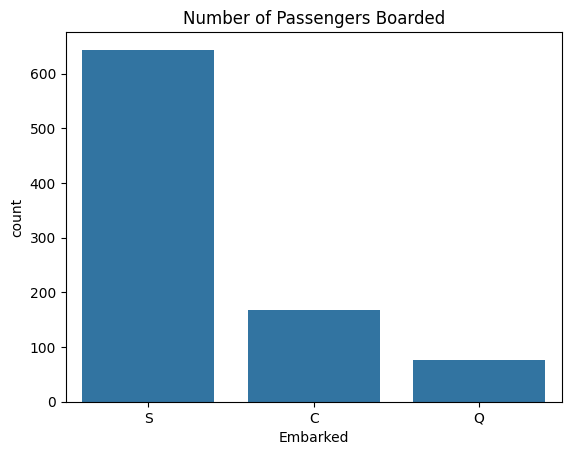

In [15]:
sns.countplot(x='Embarked',data=df)
plt.title('Number of Passengers Boarded')
plt.show()

In [16]:
# EmbarkedとAgeの欠損値を補完する
# Ageは数値データなので安直に平均値で補完する
age = pd.concat([df['Age'], df_test['Age']])
fare = pd.concat([df['Fare'], df_test['Fare']])

df['Age'].fillna(age.mean(), inplace=True)
df_test['Age'].fillna(age.mean(), inplace=True)

df['Fare'].fillna(fare.mean(), inplace=True)
df_test['Fare'].fillna(fare.mean(), inplace=True)

# Embarkedは欠損値の数が少ないため、指定して補完する(Sが圧倒的に多いのでSで補完)
df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

---

# 特徴量エンジニアリング

説明変数に手を加え、モデルの学習に効果的な変数(特徴量)を作成する試みです。

データ分析コンペで最も大きく差が出る要因の一つになります。

→カテゴリカル変数を使用できるように処理を施す

→ドメイン知識に基づく特徴量の作成

## カテゴリカル変数のエンコーディング

### ２値のカテゴリカル変数

In [17]:
df.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


### ３種類以上のカテゴリカル変数
One-Hot  Encodingを使用します。

→カテゴリカル変数の値の種類だけカラムが増えてしまうため、種類が多い場合にはLabel-Count Encodingを使用します。

In [18]:
df_train_ohe = pd.get_dummies(df['Embarked'])
df_test_ohe = pd.get_dummies(df_test['Embarked'])

df = pd.concat([df, df_train_ohe], axis=1)
df_test = pd.concat([df_test, df_test_ohe], axis=1)

df.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

## ドメイン知識に基づく特徴量エンジニアリング

SibSpは同乗していた兄弟姉妹・配偶者の数であり、Parchは同乗していた親・子供の数であるので、SibSpの値とParchの値の和をとって「同乗していた家族の人数」という新しい変数を加えるアイデアが得られます。

しかし、精度が下がってしまったので、採用はしませんが、試行錯誤の結果として残しておきます。

In [19]:
df_fe = df.copy()
df_fe_test = df_test.copy()

df_fe['Family'] = df['SibSp'] + df['Parch']
df_fe_test['Family'] = df_test['SibSp'] + df_test['Parch']

df_fe.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Family
0,1,0,3,0,22.000000,1,0,7.2500,False,False,True,1
1,2,1,1,1,38.000000,1,0,71.2833,True,False,False,1
2,3,1,3,1,26.000000,0,0,7.9250,False,False,True,0
3,4,1,1,1,35.000000,1,0,53.1000,False,False,True,1
4,5,0,3,0,35.000000,0,0,8.0500,False,False,True,0
5,6,0,3,0,29.881138,0,0,8.4583,False,True,False,0
6,7,0,1,0,54.000000,0,0,51.8625,False,False,True,0
7,8,0,3,0,2.000000,3,1,21.0750,False,False,True,4
8,9,1,3,1,27.000000,0,2,11.1333,False,False,True,2
9,10,1,2,1,14.000000,1,0,30.0708,True,False,False,1


In [20]:
X_fe = df_fe.iloc[:, 2:].values
y_fe = df_fe.iloc[:, 1].values

X_fe_test = df_fe_test.iloc[:, 1:].values

X_fe_train, X_fe_test, y_fe_train, y_fe_test = train_test_split(X_fe, y_fe, test_size=0.3, random_state=42)

rfc_fe = RandomForestClassifier(max_depth=7, min_samples_leaf=1, n_estimators=100, n_jobs=-1, random_state=42)
rfc_fe.fit(X_fe_train, y_fe_train)

print('Train Score: {}'.format(round(rfc_fe.score(X_fe_train, y_fe_train), 3)))
print(' Test Score: {}'.format(round(rfc_fe.score(X_fe_test, y_fe_test), 3)))

Train Score: 0.905
 Test Score: 0.802


In [21]:
# max_depthとmin_samples_leafの候補を作成
param_grid = {'max_depth': [3, 4, 5, 7],
              'min_samples_leaf': [1, 2, 3]}

# 訓練データを５分割し(cv=5)、クロスバリデーションの実施
rfc_fe_gs = GridSearchCV(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=5)
rfc_fe_gs.fit(X_fe_train, y_fe_train)

# 最適なパラメータと正解率
print(rfc_fe_gs.best_params_)
print(round(rfc_fe_gs.best_score_, 3))

{'max_depth': 7, 'min_samples_leaf': 2}
0.83


---

# ベースラインモデルの構築
機械学習モデルが学習できる形に成形されているかの確認を目的としています。

また、改良されたモデルと比較して改良の効果を確認します。

→あくまで確認が目的なので、学習に時間のかからないアルゴリズムを使用します

よく使用されるのはランダムフォレスト(決定木系)

In [22]:
# 説明変数と目的変数に分割
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

X_valid = df_test.iloc[:, 1:].values

In [23]:
# ホールドアウト法(過学習の抑制)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# クラスの初期化と学習
rfc = RandomForestClassifier(max_depth=10, min_samples_leaf=1, n_estimators=100, n_jobs=1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=1, random_state=42)

In [24]:
# 正解率
print(round(rfc.score(X_train,y_train), 3))
print(round(rfc.score(X_test,y_test), 3))

0.953
0.791


## 過学習の解決
訓練データとテストデータの正解率が著しくかけ離れている場合は、過学習が起きています。

→機械学習のハイパーパラメータを調整することで解決を図ります

ランダムフォレストモデルの場合には、max_depthの値を大きく設定するほど過学習の傾向が強くなりますが、小さく設定すると未学習に陥り、モデルの精度を得られません。

最適なハイパーパラメータを見つける方法には、グリッドサーチやベイズ最適化があります。

### グリッドサーチ
ハイパーパラメータの組み合わせをしらみつぶしにモデルの予測精度を評価していく手法です。

クロスバリデーションと組み合わせて利用することが多いです。

## ランダムフォレストのハイパーパラメータ(引数)
- max_depth：決定木の深さの最大値
- min_samples_leaf：葉が含むサンプル数の最小値
- n_estimators：決定木の数
- n_jobs：計算に用いるスレッド数
- random_state：乱数生成のシード値

In [25]:
# max_depthとmin_samples_leafの候補を作成
param_grid = {'max_depth': [3, 4, 5, 7],
              'min_samples_leaf': [1, 2, 3]}

# 訓練データを５分割し(cv=5)、クロスバリデーションの実施
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=5)
rfc_gs.fit(X, y)

# 最適なパラメータと正解率
print(rfc_gs.best_params_)
print(round(rfc_gs.best_score_, 3))

{'max_depth': 7, 'min_samples_leaf': 3}
0.825


---

# モデル構築と評価

In [26]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

print('Logistic Regression \n')
print('Train Score: {}'.format(round(lr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(lr.score(X_test, y_test), 3)))

Logistic Regression 

Train Score: 0.803
 Test Score: 0.813


In [27]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

# 訓練データを５分割し(cv=5)、クロスバリデーションの実施
lr_gs = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
lr_gs.fit(X, y)

# 最適なパラメータと正解率
print(lr_gs.best_params_)
print(round(lr_gs.best_score_, 3))

{'C': 0.1}
0.796


In [28]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0)
mlpc.fit(X_train, y_train)

print('Multilayer Perceptron \n')
print('Train Score: {}'.format(round(mlpc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(mlpc.score(X_test, y_test), 3)))

Multilayer Perceptron 

Train Score: 0.828
 Test Score: 0.802


# モデルのアンサンブリング

In [29]:
rfc_pred = rfc_gs.predict_proba(X_valid)
lr_pred = lr.predict_proba(X_valid)
mlpc_pred = mlpc.predict_proba(X_valid)

pred_proba = (rfc_pred + lr_pred + mlpc_pred) / 3
pred = pred_proba.argmax(axis=1)

# 予測の出力・提出
提出する際には、規定の形式としてgender_submission.csvが用意されているので、これに上書きをして提出します。

In [30]:
path = '/content/drive/MyDrive/Colab Notebooks/'

df_submit = pd.read_csv(path + 'GCI/個人ワーク/dataset/gender_submission.csv')
df_submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
# 予測値のサイズを確認
pred.shape

(418,)

In [32]:
df_submit['Survived'] = pred
df_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission.csv',index=False)

from google.colab import files
files.download('submission.csv')